In [7]:
import pandas as pd

# Load the dataset
file_path = "/mnt/data/Day 47 Model_Validation_Data.csv"
df = pd.read_csv('Day 47 Model_Validation_Data.csv')

# Display the first five rows of the dataset
df.head()


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Target
0,-0.430668,0.672873,-0.724280,-0.539630,-0.651600,0
1,0.211646,-0.843897,0.534794,0.825848,0.681953,1
2,1.092675,0.409106,1.100096,-0.942751,-0.981509,0
3,1.519901,-0.773361,1.998053,0.155132,-0.385314,0
4,-0.453901,-2.183473,0.244724,2.591239,-0.484234,1


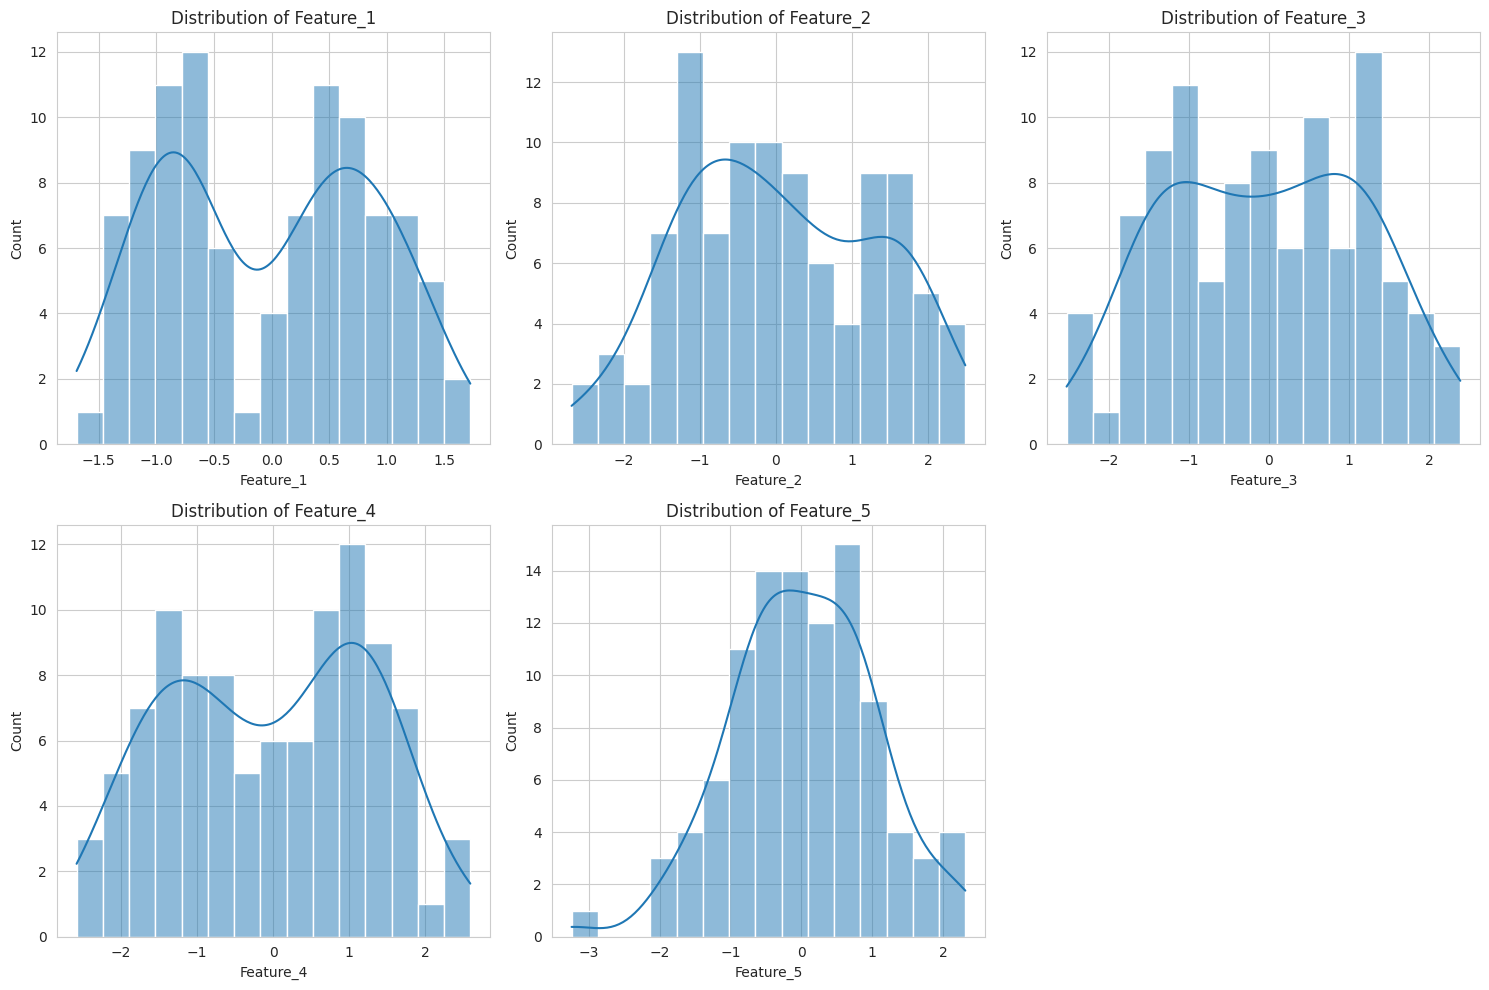

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("whitegrid")

# Create histograms for each feature
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

features = df.columns[:-1]  # Exclude the target column

for i, feature in enumerate(features):
    row, col = divmod(i, 3)
    sns.histplot(df[feature], bins=15, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Distribution of {feature}")

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Define features and target
X = df.drop(columns=["Target"])
y = df["Target"]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

accuracy, precision, recall


(0.95, 1.0, 0.9)